### Problem Statement


    Predicting if the cancer diagnosis is benign or malignant based on several observations/features
    Applying ANN Model for prediction
    
    30 features are used, examples:

      - radius (mean of distances from center to points on the perimeter)
      - texture (standard deviation of gray-scale values)
      - perimeter
      - area
      - smoothness (local variation in radius lengths)
      - compactness (perimeter^2 / area - 1.0)
      - concavity (severity of concave portions of the contour)
      - concave points (number of concave portions of the contour)
      - symmetry 
      - fractal dimension ("coastline approximation" - 1)

    Datasets are linearly separable using all 30 input features
    Number of Instances: 569
    Class Distribution: 212 Malignant, 357 Benign
    Target class:

       - Malignant
       - Benign



### Step 1: Initial setups

In [0]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score 
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz 
%matplotlib inline

### Step 2: Load & Describe data

In [0]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer['DESCR']) #dataset description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
print(cancer['target_names'])

['malignant' 'benign']


In [6]:
print(cancer['target'])
#malignant : 0
#benign : 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [7]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
cancer['data'].shape

(569, 30)

In [9]:
#making dataframe object
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [10]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
# This will give us the total number of missing values feature-wise
df_cancer.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

- No missing values found.
- No categorical values.

### Step 3: Visualizing the data

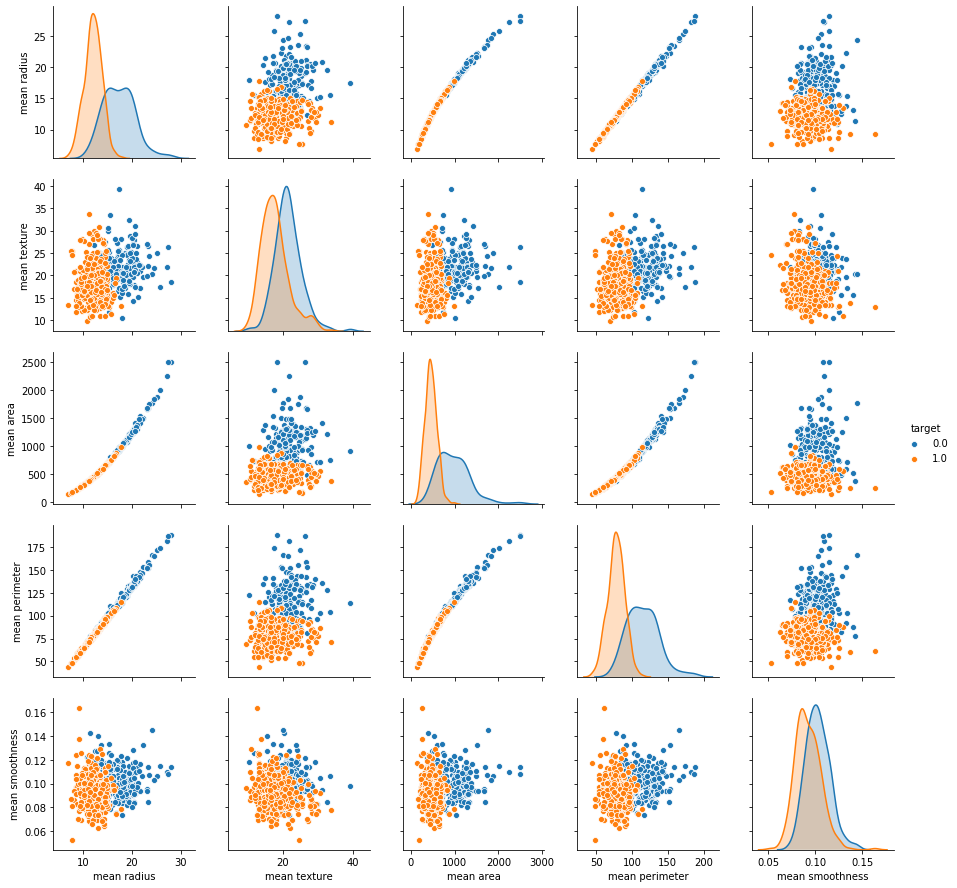

In [12]:
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )

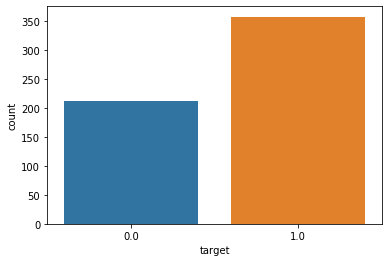

In [13]:
sns.countplot(df_cancer['target'], label = "Count") 

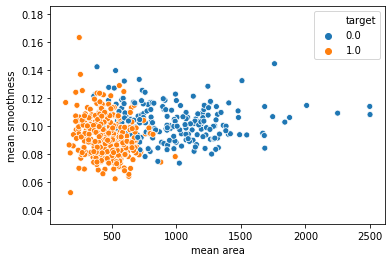

In [14]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer)

### Step 4: Feature Selection


Here we will compare three methods for feature selection: (1) No feature selection; (2) retain only features that are not correlated; (3) use PCA transformation to select features and reduce feature correlation.


* Preparing the data

In [0]:
#target class
targets=df_cancer['target']
#all other attributes except targets
inputs=df_cancer.drop(['target'],axis=1)

* scale the data

In [0]:
# Import the scaling module
#from sklearn.preprocessing import StandardScaler

# Create a scaler object
#scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
#scaler.fit(inputs)

In [0]:
# Scale the features and store them in a new variable (the actual scaling procedure)
#inputs_scaled = pd.DataFrame(scaler.transform(inputs),columns=inputs.columns, index=inputs.index)

* train-test split

In [0]:
# Import the module for the split
from sklearn.model_selection import train_test_split
# Split the variables with an 80-20 split and some random state
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.20, random_state=5)

`1. No feature selection`

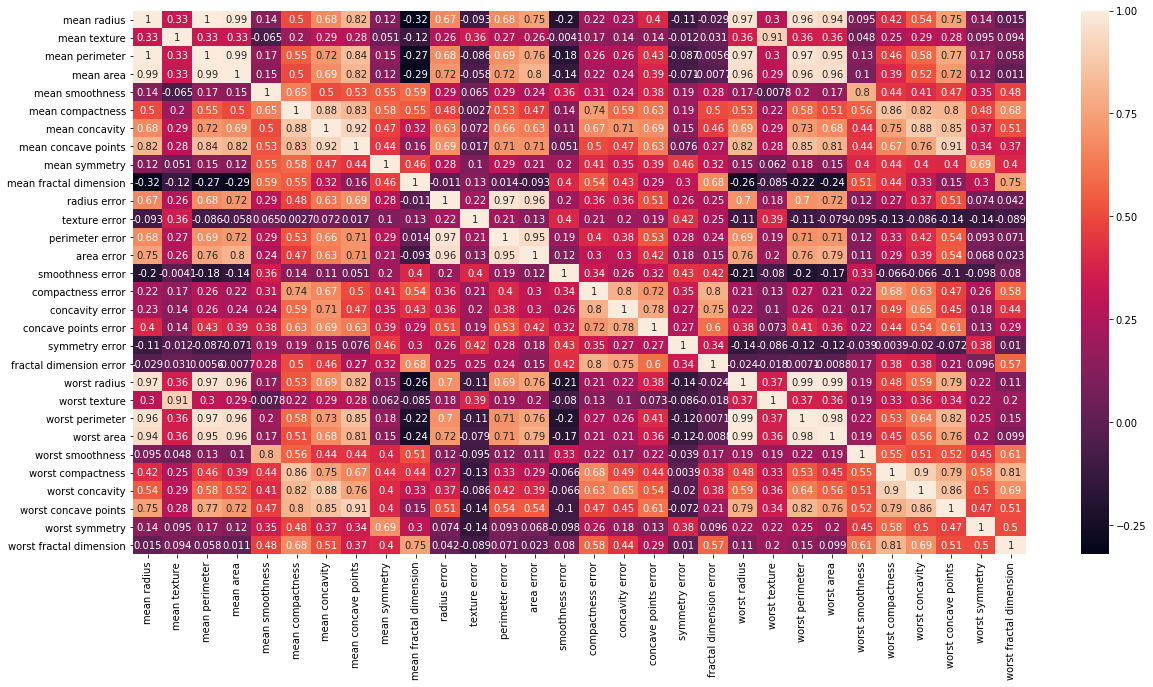

In [19]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(X_train.corr(), annot=True) 

`2. Retain only features that are not correlated`


 Feature Names: 

 ['mean texture' 'mean area' 'mean symmetry'] 


Feature Correlation:



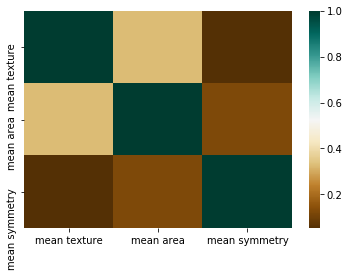

In [20]:
sizeMeasurements2 = df_cancer.drop(['mean radius','mean perimeter',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean fractal dimension',
 'radius error', 'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius', 'worst perimeter', 
 'worst smoothness', 'worst compactness', 
 'worst concave points', 'worst symmetry', 'worst fractal dimension','worst texture', 'worst area',
 'worst concavity'], axis=1)
X2 = sizeMeasurements2[sizeMeasurements2.columns[:-1]]
y2 = sizeMeasurements2.target
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.2,random_state=5)
print('\n Feature Names: \n\n', X2.columns.values, "\n")
print("\nFeature Correlation:\n")
g = sns.heatmap(X_train2.corr(),cmap="BrBG",annot=False)

`3. Use PCA transformation to select features and reduce feature correlation.`


 Feature Names: 

 [0 1 2 3 4] 


Feature Correlation:



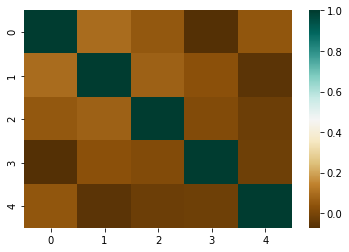

In [21]:
from sklearn.decomposition import PCA
X3=inputs
y3=targets
variance_pct = 5 # Minimum percentage of variance we want to be described by the resulting transformed components
pca = PCA(n_components=variance_pct) # Create PCA object
X_transformed = pca.fit_transform(X3,y3) # Transform the initial features
X3pca = pd.DataFrame(X_transformed) # Create a data frame from the PCA'd data
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3pca, y3, test_size=0.2)
print('\n Feature Names: \n\n', X3pca.columns.values, "\n")
#print('First Few Values, After PCA: \n\n,',X3pca.head(),'\n\n')
print("\nFeature Correlation:\n")
g = sns.heatmap(X_train3.corr(),cmap="BrBG",annot=False)

### Step 5: Evaluate Model Performance

In [22]:
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf1.fit(X_train, y_train)
clf2 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf2.fit(X_train2, Y_train2)
clf3 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=12)
clf3.fit(X_train3, Y_train3)
print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(X_test, y_test)))
print('Accuracy of Decision Tree classifier on reduced training set: {:.2f}'.format(clf2.score(X_train2, Y_train2)))
print('Accuracy of Decision Tree classifier on reduced test set: {:.2f}'.format(clf2.score(X_test2, Y_test2)))
print('Accuracy of Decision Tree classifier on PCA-transformed training set: {:.2f}'.format(clf3.score(X_train3, Y_train3)))
print('Accuracy of Decision Tree classifier on PCA-transformed test set: {:.2f}'.format(clf3.score(X_test3, Y_test3)))

Accuracy of Decision Tree classifier on original training set: 0.95
Accuracy of Decision Tree classifier on original test set: 0.96
Accuracy of Decision Tree classifier on reduced training set: 0.91
Accuracy of Decision Tree classifier on reduced test set: 0.92
Accuracy of Decision Tree classifier on PCA-transformed training set: 0.95
Accuracy of Decision Tree classifier on PCA-transformed test set: 0.96


### Step 6: Explore Decision Trees


1. No Feature Selection

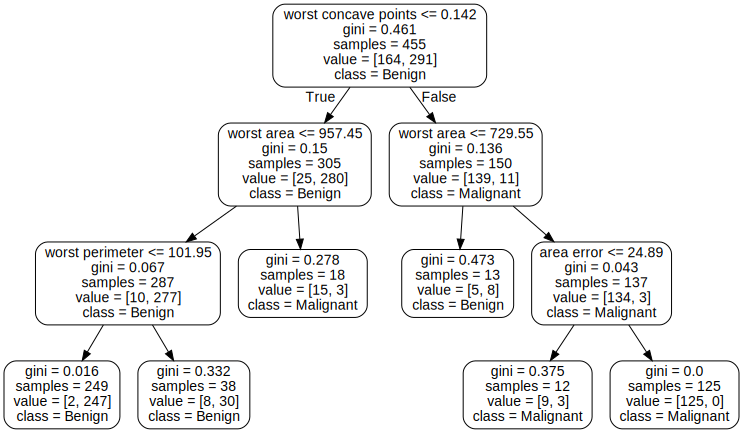

In [23]:
feature_names1 = inputs.columns.values
feature_names2 = X2.columns.values
feature_names3 = X3pca.columns.values

def plot_decision_tree1(a,b):
    dot_data = tree.export_graphviz(a, out_file=None, 
                             feature_names=b,  
                             class_names=['Malignant','Benign'],  
                             filled=False, rounded=True,  
                             special_characters=False)  
    graph = graphviz.Source(dot_data)  
    return graph 
plot_decision_tree1(clf1,feature_names1)

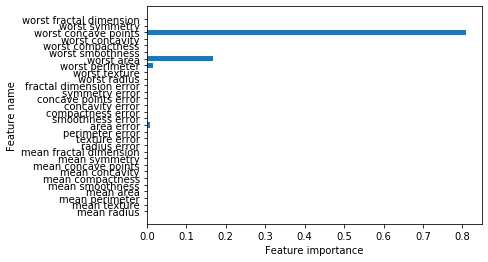

In [24]:
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
plot_feature_importances(clf1, feature_names1)

2. retain only features that are not correlated

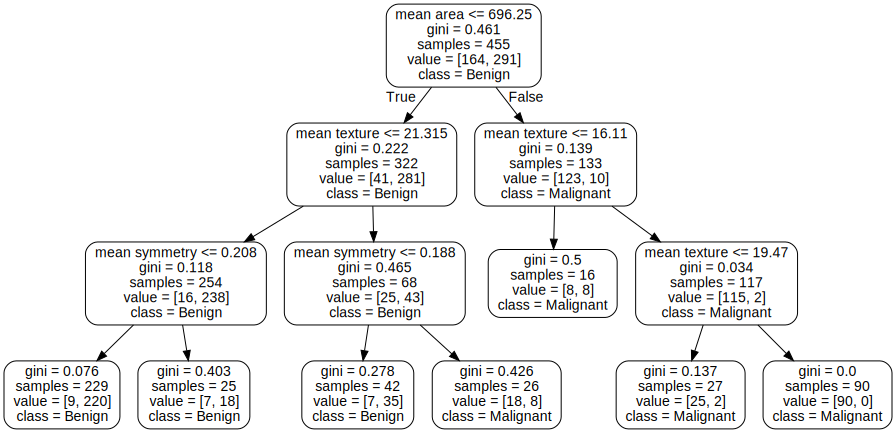

In [25]:
plot_decision_tree1(clf2,feature_names2)

3. Retain only features that were produced through PCA transformation.

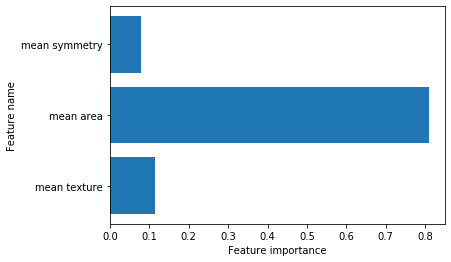

In [26]:
plot_feature_importances(clf2, feature_names2)
plt.show()

### Step 7: Define Helper Functions for Learning Curve and Confusion Matrix

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dict_characters = {0: 'Malignant', 1: 'Benign'}

### Step 8: Evaluate Random Forest Classifier

Accuracy of Random Forest Classifier on training data: 1.00
Accuracy of Random Forest Classifier on testing data: 0.97


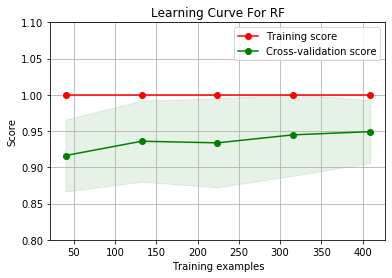

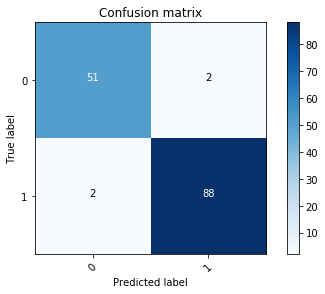

In [28]:
(X1, y1) = load_breast_cancer(return_X_y = True)
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X1,y1,random_state=0)
clf = RandomForestClassifier(max_features=8,random_state=0)
clf.fit(X_train1,Y_train1)
print('Accuracy of Random Forest Classifier on training data: {:.2f}'.format(clf.score(X_train1,Y_train1)))
print('Accuracy of Random Forest Classifier on testing data: {:.2f}'.format(clf.score(X_test1,Y_test1)))
model = clf
prediction = model.predict(X_test1)
cnf_matrix = confusion_matrix(Y_test1, prediction)
plt.show()
plot_learning_curve(model, 'Learning Curve For RF', X_train, y_train, (0.80,1.1), 10)
plt.show()
plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
plt.show()